In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import os.path
import math
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
e = math.exp(1)

# Внимательно смотреть на передаваемые индексы!!!

      Iter       Train Loss   Remaining Time 
         1           1.0190           20.17s
         2           0.9246           20.09s
         3           0.8491           18.86s
         4           0.7722           17.53s
         5           0.7069           17.20s
         6           0.6672           16.92s
         7           0.6394           16.39s
         8           0.5763           16.58s
         9           0.5599           15.88s
        10           0.5445           15.34s
        20           0.2747           13.70s
        30           0.1705           12.24s
        40           0.1039           11.89s
        50           0.0682           11.05s
        60           0.0464           10.41s
        70           0.0300            9.73s
        80           0.0198            9.17s
        90           0.0136            8.56s
       100           0.0099            8.00s
       200           0.0004            2.38s
0.00021384367344295076 187
0.5794326312076077 0
      

<Figure size 1440x1440 with 0 Axes>

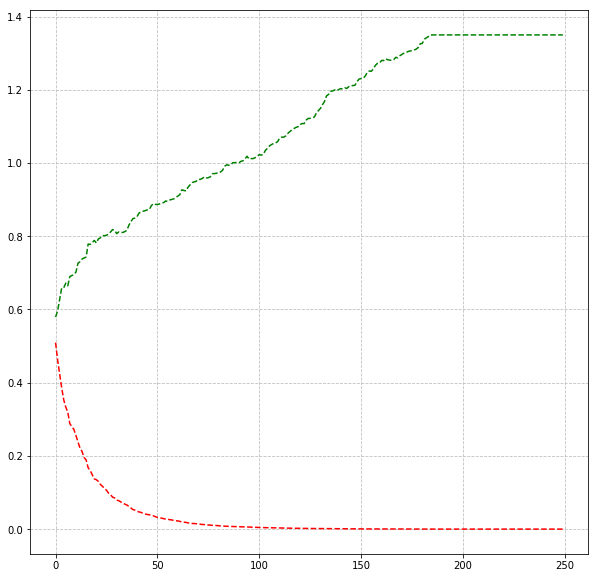

<Figure size 1440x1440 with 0 Axes>

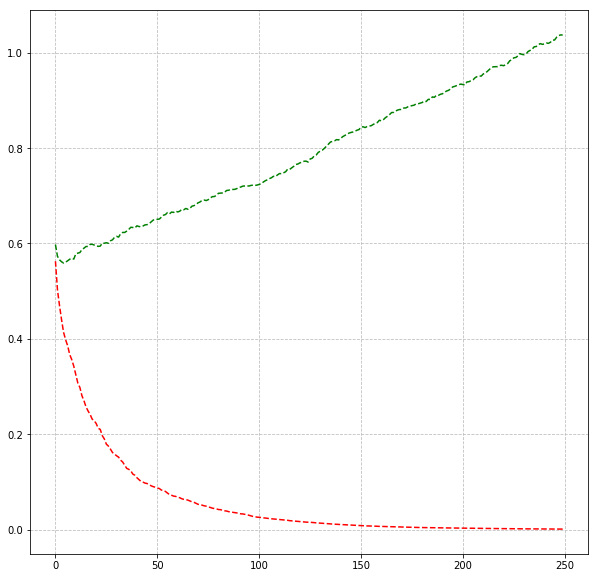

<Figure size 1440x1440 with 0 Axes>

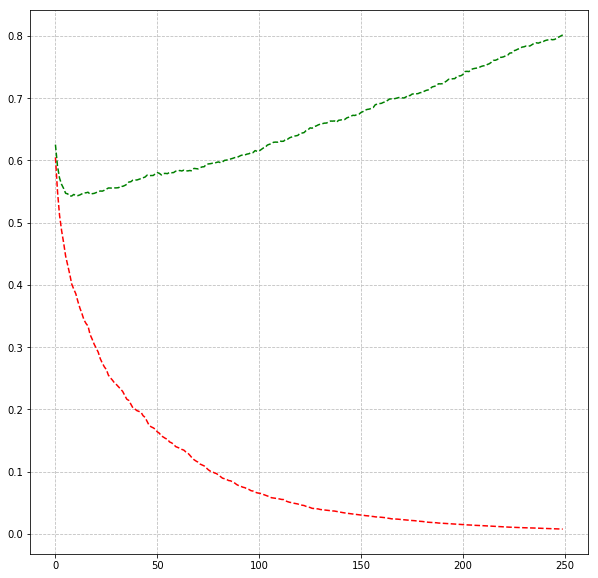

<Figure size 1440x1440 with 0 Axes>

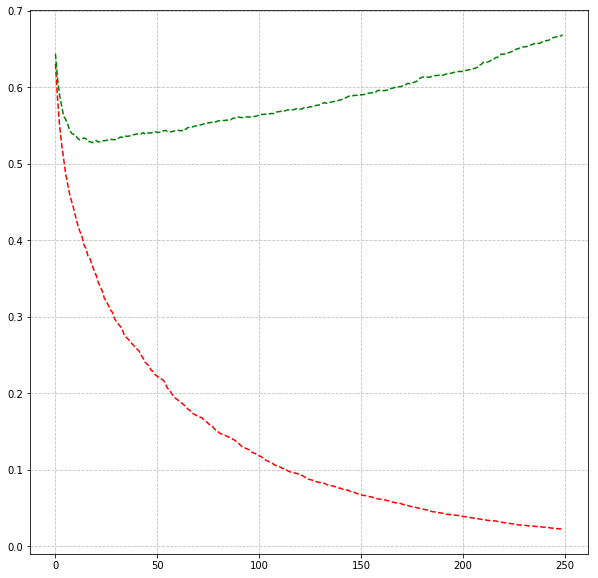

<Figure size 1440x1440 with 0 Axes>

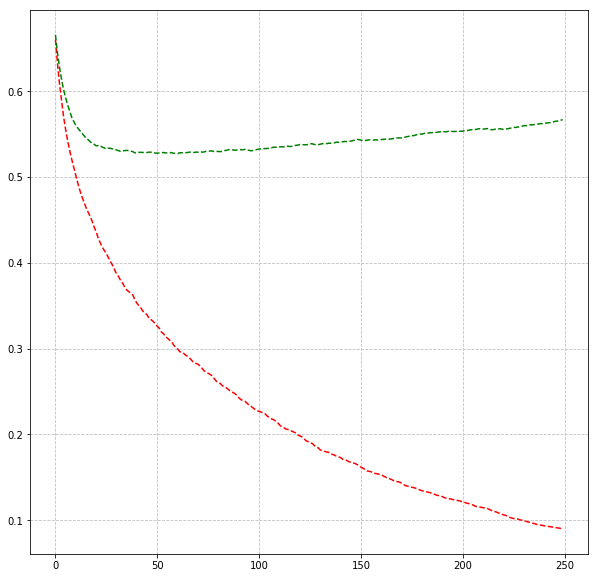

In [8]:
# Обучающая выборка
train = pd.read_csv(r"D:\works\gbm-data.csv")
mass = [1, 0.5, 0.3, 0.2, 0.1]

X = train[train.columns.values.tolist()[1:train.shape[1]-1]]
y = train['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

for i in range(0,5,1): 
    plt.figure(figsize=(20,20))
    GBC = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate = mass[i])
    GBC.fit(X_train, y_train)
    q = pd.DataFrame()
    z = pd.DataFrame()
  
    for i in  enumerate(GBC.staged_predict_proba(X_train)):
        q.loc[i[0],0] = log_loss(y_train, i[1][:,1])
        q.loc[i[0],1] = i[0]
    
    for i in  enumerate(GBC.staged_predict_proba(X_test)):
        z.loc[i[0],0] = log_loss(y_test, i[1][:,1])
        z.loc[i[0],1] = i[0]
        
    plt.figure(figsize=(10,10))
    plt.plot(q.loc[:,1],q.loc[:,0], 'r--')
    plt.plot(z.iloc[:,1],z.iloc[:,0], 'g--')
    plt.grid(True, linestyle='--', color='0.75')
    print(q.loc[:,0].min(), q.loc[:,0].idxmin())
    print(z.loc[:,0].min(), z.loc[:,0].idxmin())

In [50]:
# Обучающая выборка
train = pd.read_csv(r"D:\works\gbm-data.csv")
mass = [1, 0.5, 0.3, 0.2, 0.1]

X = train[train.columns.values.tolist()[1:train.shape[1]]]
y = train['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

GFC = RandomForestClassifier(n_estimators=20, random_state=241)
GFC.fit(X_train, y_train)
# predict_proba дает вероятности для полученных значений
# predict сами значения
q = GFC.predict_proba(X_test)
log_loss(y_test, q)

MemoryError: 